<a href="https://colab.research.google.com/github/Jacobgokul/ML-Playground/blob/main/Logistic_Regression_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# What is Logistic Regression?
Algorithm that predicts the probability of an event occurring

# Why Logistic Regression?
 - Linear Regression works well for predicting continuous values (e.g., house rent, sales prediction).

- But when we need to classify data (e.g., spam vs. non-spam, loan approved vs. not approved), we use Logistic Regression.

- It predicts probabilities instead of direct values.

# How Does It Work?
Instead of fitting a straight line like in Linear Regression, Logistic Regression applies the Sigmoid function to predict probabilities between 0 and 1.

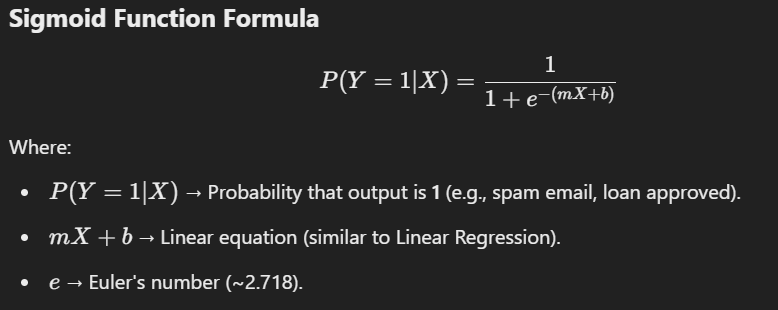

🔹 If probability ≥ 0.5, classify as 1 (positive class).

🔹 If probability < 0.5, classify as 0 (negative class).

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
# Dataset
data = {
    "Age": [22, 25, 28, 30, 32, 35, 40, 45, 50, 55],
    "Income": [13, 4, 5, 12, 27, 11, 30, 52, 15, 20],
    "Buys_House": [1, 0, 0, 0, 1, 0, 1, 1, 0, 1]
}

df = pd.DataFrame(data)
df

,Age,Income,Buys_House
0,22,13,1
1,25,4,0
2,28,5,0
3,30,12,0
4,32,27,1
5,35,11,0
6,40,30,1
7,45,52,1
8,50,15,0
9,55,20,1


In [9]:
#EDA
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Age         10 non-null     int64
 1   Income      10 non-null     int64
 2   Buys_House  10 non-null     int64
dtypes: int64(3)
memory usage: 372.0 bytes


(10, 3)

In [13]:
df["extra feature"] = [i for i in range(10)] #providing extra features

In [14]:
df

,Age,Income,Buys_House,extra feature
0,22,13,1,0
1,25,4,0,1
2,28,5,0,2
3,30,12,0,3
4,32,27,1,4
5,35,11,0,5
6,40,30,1,6
7,45,52,1,7
8,50,15,0,8
9,55,20,1,9


In [16]:
# Features (X) and Target (Y)
X = df[["Age", "Income"]]
y = df["Buys_House"]


In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train

,Age,Income
5,35,11
0,22,13
7,45,52
2,28,5
9,55,20
4,32,27
3,30,12
6,40,30


In [21]:
X_test

,Age,Income
8,50,15
1,25,4


In [22]:
y_train

,Buys_House
5,0
0,1
7,1
2,0
9,1
4,1
3,0
6,1


In [23]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [25]:
X_test_scaled

array([[ 1.43893597, -0.44480043],
       [-1.10785336, -1.22764918]])

In [24]:
X_train_scaled

array([[-0.08913763, -0.7294727 ],
       [-1.41346808, -0.58713656],
       [ 0.9295781 ,  2.1884181 ],
       [-0.80223864, -1.15648111],
       [ 1.94829384, -0.08896009],
       [-0.39475235,  0.40921639],
       [-0.59849549, -0.65830463],
       [ 0.42022024,  0.6227206 ]])

In [26]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [27]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

In [28]:
y_pred

array([1, 0])

In [29]:
from sklearn.metrics import accuracy_score, classification_report

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:\n", report)

Model Accuracy: 50.00%
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.00      0.00      0.00         0

    accuracy                           0.50         2
   macro avg       0.50      0.25      0.33         2
weighted avg       1.00      0.50      0.67         2



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [34]:
#If a new person (Age = 29, Income = 5.5L) wants to buy a house:

new_data = scaler.transform([[29, 55]])
prediction = model.predict(new_data)

if prediction[0] == 1:
    print("Person is likely to buy a house.")
else:
    print("Person is unlikely to buy a house.")

Person is likely to buy a house.


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
